# Using your model
    

In this notebook, we discuss how to use the model structure discussed in Tutorial 1, "Choosing your model". If you have not done so already, go to the "Choosing your model" notebook to learn about how to build a model.

Once you have done this, import PyBEAM's pre-coded sub-module.


In [1]:
# import PyBEAM's default module
import pybeam.precoded as pbp


We will first create the 'simpleDDM' model discussed in "Choosing your model" with no additional features.


In [2]:
# call simpleDDM model
model = pbp.simpleDDM()


After specifying the model, you can determine what parameters your model needs. You do so by examining the parameters attribute of your called model class. These parameters are the input values for future functions.


In [3]:
model.parameters()


['tnd', 'w', 'mu', 'b']

Now that we have defined our model and checked that is uses the parameters we desire, we now introduce functions PyBEAM implements that you can use to test your model.

The first is simulate, a function which simulates data from your model. This requires at least three inputs: N_sims, model, and phi. The first, N_sims, sets how many data points are generated. The second, model, requires the model class defined above.

The last, phi, is a dictionary containing the parameters (as keys) and their values (as the key's values). Per the parameters attribute, this dictionary requires four keys: 't_nd', 'w', 'mu', and 'b'. The values corresponding to these keys are the parameter's values.

Two optional inputs are also available for this funtion. The first, seed, allows you to set a random generator seed so that you can reproduce your data set. The second, dt, allows for modification of the simulation function's time step (by default, dt = 0.0001).

This functions outputs a dictionary containing two keys: 'rt_upper' and 'rt_lower'. These correspond to the simulated reaction time data sets for the upper and lower decision thresholds, respectively.


In [30]:
# parameters for model
phi = {'tnd' : 0.25,  # non-decision time
         'w' : 0.5,   # relative start point
        'mu' : 1.0 ,  # drift rate
         'b' : 0.75}  # decision threshold location

# simulate data from the model
rt = pbp.simulate(N_sims = 1000,   # number of data points to simulate
                   model = model,  # dictionary containing model information
                     phi = phi)    # parameters used to simulate data

rt


{'rt_upper': array([1.4563, 0.9354, 0.44  , 0.7489, 0.7687, 0.4504, 0.4781, 0.3966,
        0.8795, 0.5567, 0.5331, 0.4265, 0.6217, 0.3299, 0.3529, 0.8817,
        1.4517, 0.4827, 0.4905, 1.1297, 0.8588, 0.4076, 0.3485, 0.6341,
        0.5732, 0.5501, 1.227 , 1.2519, 0.5713, 0.3279, 0.5232, 0.4942,
        1.9596, 0.4458, 0.3627, 0.5699, 0.4864, 0.7429, 1.2721, 0.635 ,
        0.77  , 0.7986, 0.5278, 0.5467, 0.8783, 0.6447, 0.4313, 0.5846,
        1.2013, 0.3825, 0.9944, 0.4396, 0.4441, 0.6286, 1.2006, 0.4946,
        0.5632, 0.5449, 1.0007, 1.6269, 0.4773, 0.5285, 0.4559, 0.5573,
        0.6825, 0.9237, 0.4113, 0.5509, 0.5539, 0.416 , 0.732 , 1.0841,
        0.8167, 0.5564, 0.4255, 0.7579, 0.9068, 0.388 , 0.5924, 0.3394,
        0.5624, 0.4667, 0.4882, 0.4731, 0.5829, 0.3424, 0.5715, 0.4009,
        0.3284, 0.852 , 0.6211, 0.4547, 1.1479, 0.7719, 0.4657, 1.0896,
        0.812 , 0.3982, 0.9698, 0.6163, 0.629 , 0.6298, 0.6063, 0.6857,
        0.9806, 0.4182, 0.3167, 2.4599, 0.7639, 1.24

The next function we introduce is likelihood. likelihood takes the input model and calculates its likelihood function (i.e. the model's predicted rt distribution). It has three required inputs: model, phi, and rt_max. Model and phi are the same as for the simulate function, while rt_max is the maximum likelihood value to solve for.

It also has two optional inputs, x_res and t_res, which allow modification of the spatial and time stepping resolution. In general, these need not be touched (see default functions description file for more info).

This function outputs a dictionary containing three keys: 'time', 'lh_upper', and 'lh_lower'. These contain the time array, upper threshold likelihood function, and lower threshold likelihood function, respectively.


In [34]:
lh = pbp.likelihood(model = model,
                      phi = phi,
                   rt_max = 3.0)

lh


{'time': array([0.       , 0.0111875, 0.022375 , 0.0335625, 0.04475  , 0.0559375,
        0.067125 , 0.0783125, 0.0895   , 0.1006875, 0.111875 , 0.1230625,
        0.13425  , 0.1454375, 0.156625 , 0.1678125, 0.179    , 0.1901875,
        0.201375 , 0.2125625, 0.22375  , 0.2349375, 0.246125 , 0.2573125,
        0.2685   , 0.2796875, 0.290875 , 0.3020625, 0.31325  , 0.3244375,
        0.335625 , 0.3468125, 0.358    , 0.3691875, 0.380375 , 0.3915625,
        0.40275  , 0.4139375, 0.425125 , 0.4363125, 0.4475   , 0.4586875,
        0.469875 , 0.4810625, 0.49225  , 0.5034375, 0.514625 , 0.5258125,
        0.537    , 0.5481875, 0.559375 , 0.5705625, 0.58175  , 0.5929375,
        0.604125 , 0.6153125, 0.6265   , 0.6376875, 0.648875 , 0.6600625,
        0.67125  , 0.6824375, 0.693625 , 0.7048125, 0.716    , 0.7271875,
        0.738375 , 0.7495625, 0.76075  , 0.7719375, 0.783125 , 0.7943125,
        0.8055   , 0.8166875, 0.827875 , 0.8390625, 0.85025  , 0.8614375,
        0.872625 , 0.8838125, 

The next function we introduce is loglikelihood. loglikelihood takes the model class and and a dataset and calculates the loglikelihood of the data (based on the model's likelihood function). It has three required inputs: model, phi, and rt. model and phi are the same inputs as those used by the simulate and likelihood functions.

The input rt requires a dictionary containing the reaction time data you want to find the loglikelihood of. The dictionary must look the same as that output by simulate. It should have two keys, 'rt_upper' and 'rt_lower', whose values are lists/numpy arrays which the rt data for the upper and lower decision thresholds, respectively.

It also has two optional inputs, x_res and t_res, which allow modification of the spatial and time stepping resolution. In general, these need not be touched (see default functions description file for more info).

This function outputs a number corresponding to the data's loglikelihood.


In [32]:
ll = pbp.loglikelihood(model = model,
                         phi = phi,
                          rt = rt)

ll


-618.6874279272467

PyBEAM also contains a plotting utility. It generates a figure which overlays the model likelihood over rt data. It accepts the same model and phi inputs as the simulate function, but also requires an input of the rt. This is the same input as for the loglikelihood function. Input rt must be a dictionary containing two keys, 'rt_upper' and 'rt_lower'. The values for these keys are lists/numpy arrays which contain the rt data for the upper and lower decision thresholds, respectively.

The function has two three additional optional inputs: x_res, t_res, and bins. x_res and t_res are discussed further in the functions description notebook, but you should never need to change their default settings. bins sets the amount of histogram bins to use for the rt data. Though the default setting often is fine, it sometimes fails to choose the proper bin amount and may need to be manually input.


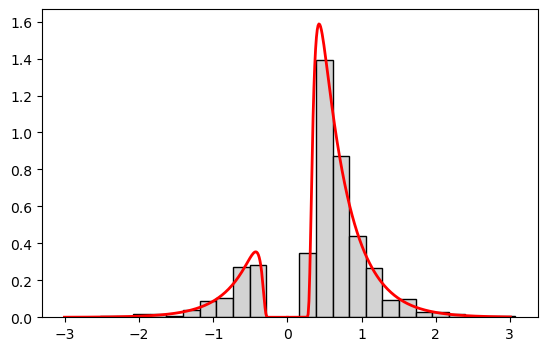

In [39]:
# plot data and model likelihood function
fig = pbp.plot_rt(model = model, # dictionary containing model information 
                    phi = phi,   # parameters used for model rt distribution
                 rt_max = 3.0,   # dictionary of simulated rt data
                     rt = rt);   # dictionary of simulated rt data
